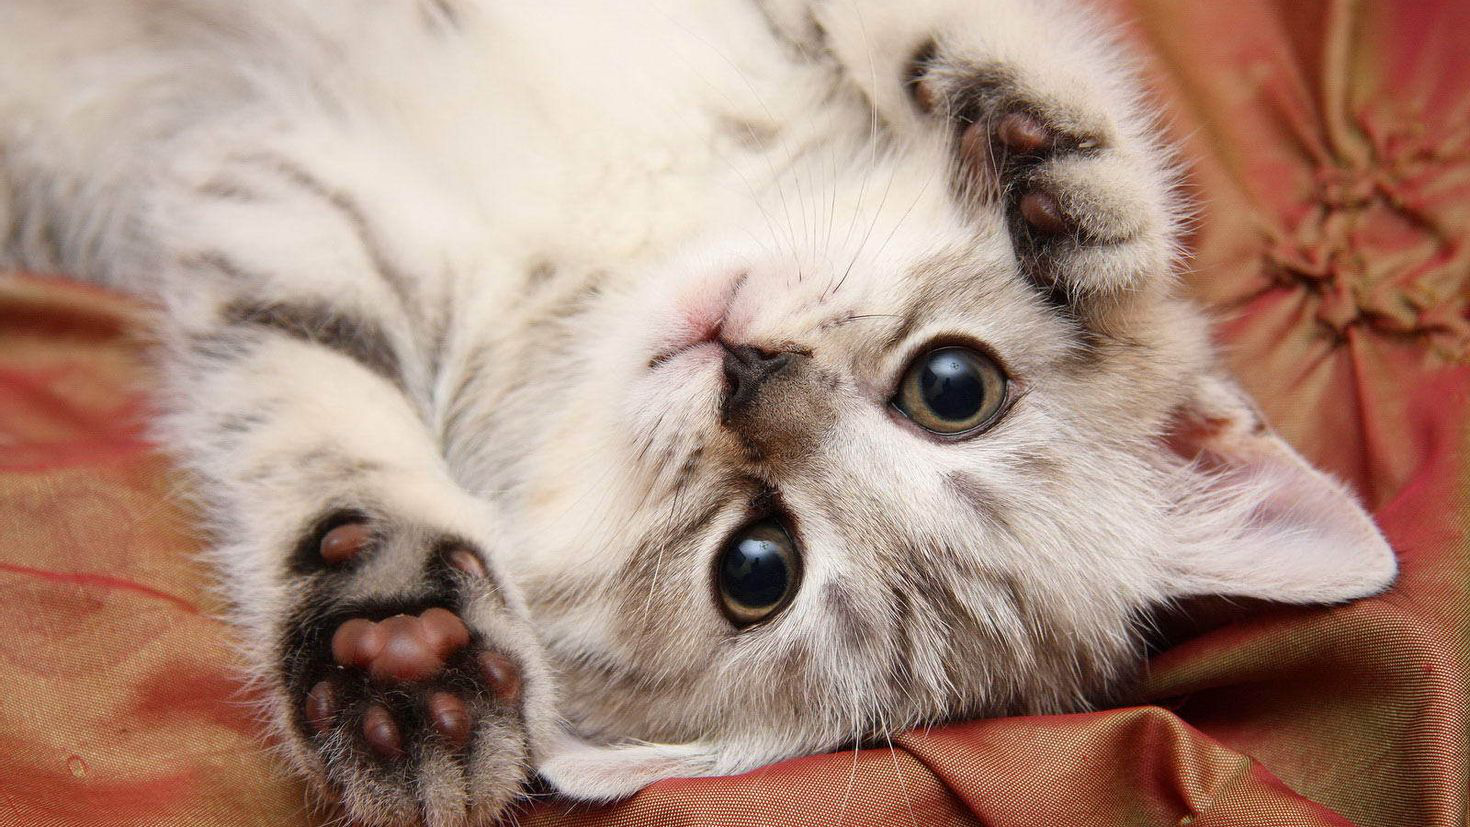

In [1]:
from PIL import Image
import numpy as np
img = Image.open("Для сжатия.jpeg")
img

In [3]:
x = np.array(img, dtype = np.float32)
y = x.mean(axis=2)
U, S, V = np.linalg.svd(y,full_matrices=False)

In [4]:
YY = []
for r in range(1, 100, 20):
    Y_r = U[:,:r].dot(np.diag(S[:r])).dot(V[:r,:])
    Y_r[Y_r < 0] = 0
    Y_r[Y_r > 255] = 255
    Image.fromarray(np.asarray(Y_r, dtype=np.uint8)).save(f'{r}.png')
    YY.append(Y_r)